# Team
 - GROUP 6
 
- Prajwal Venugopal
- Rithvik Mysore Suresh
- Vijay Sunkugari
- Venkata Gummadi


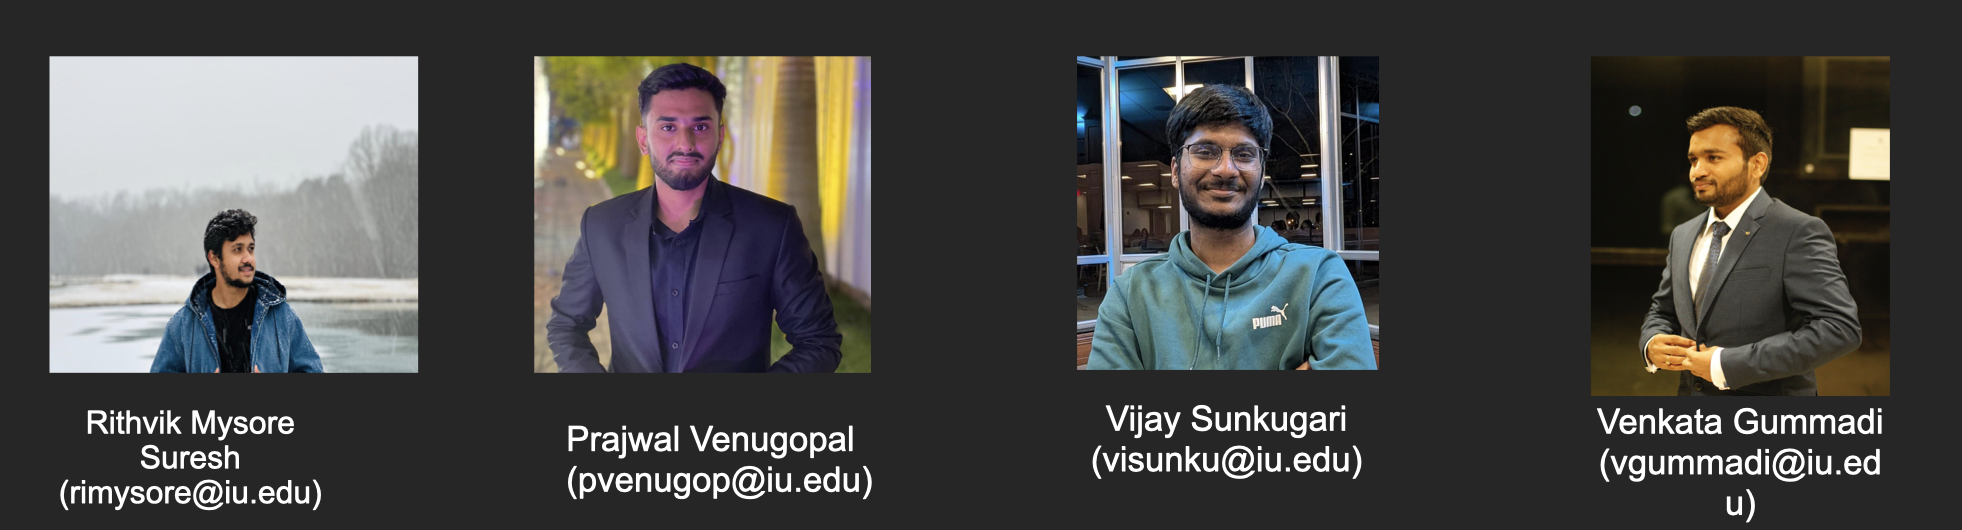

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


# Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




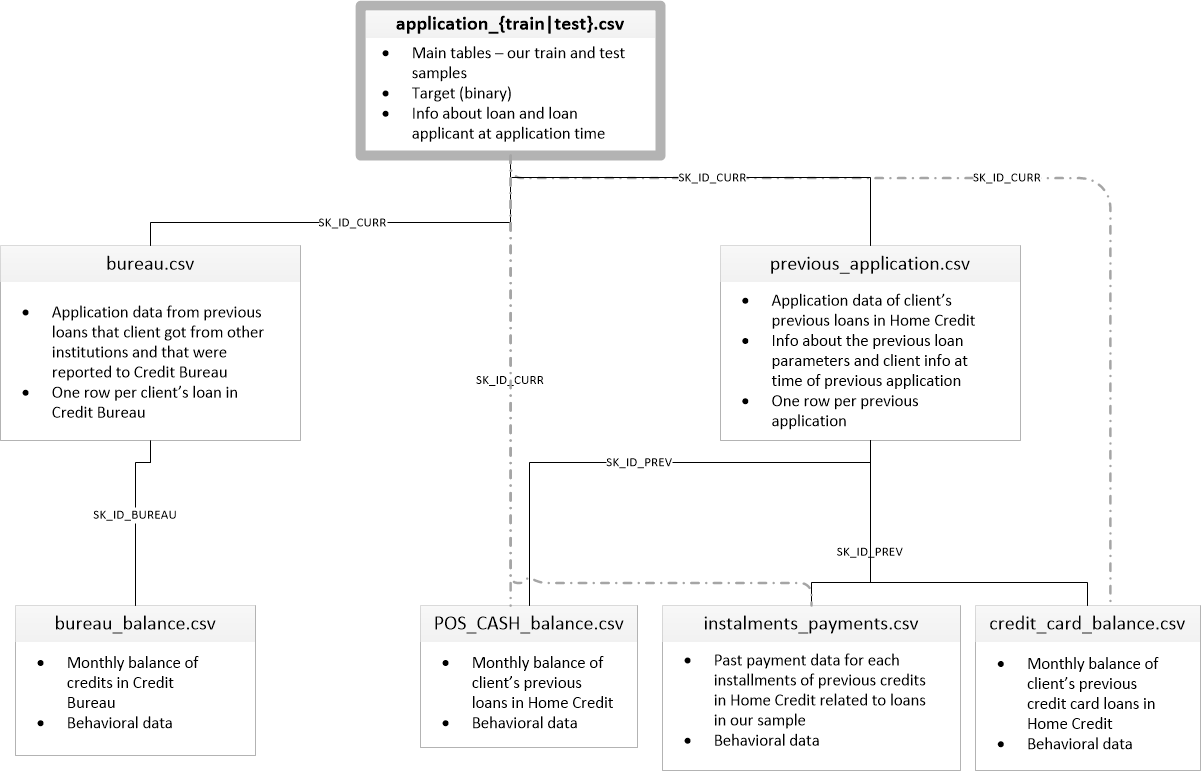

### Imports

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

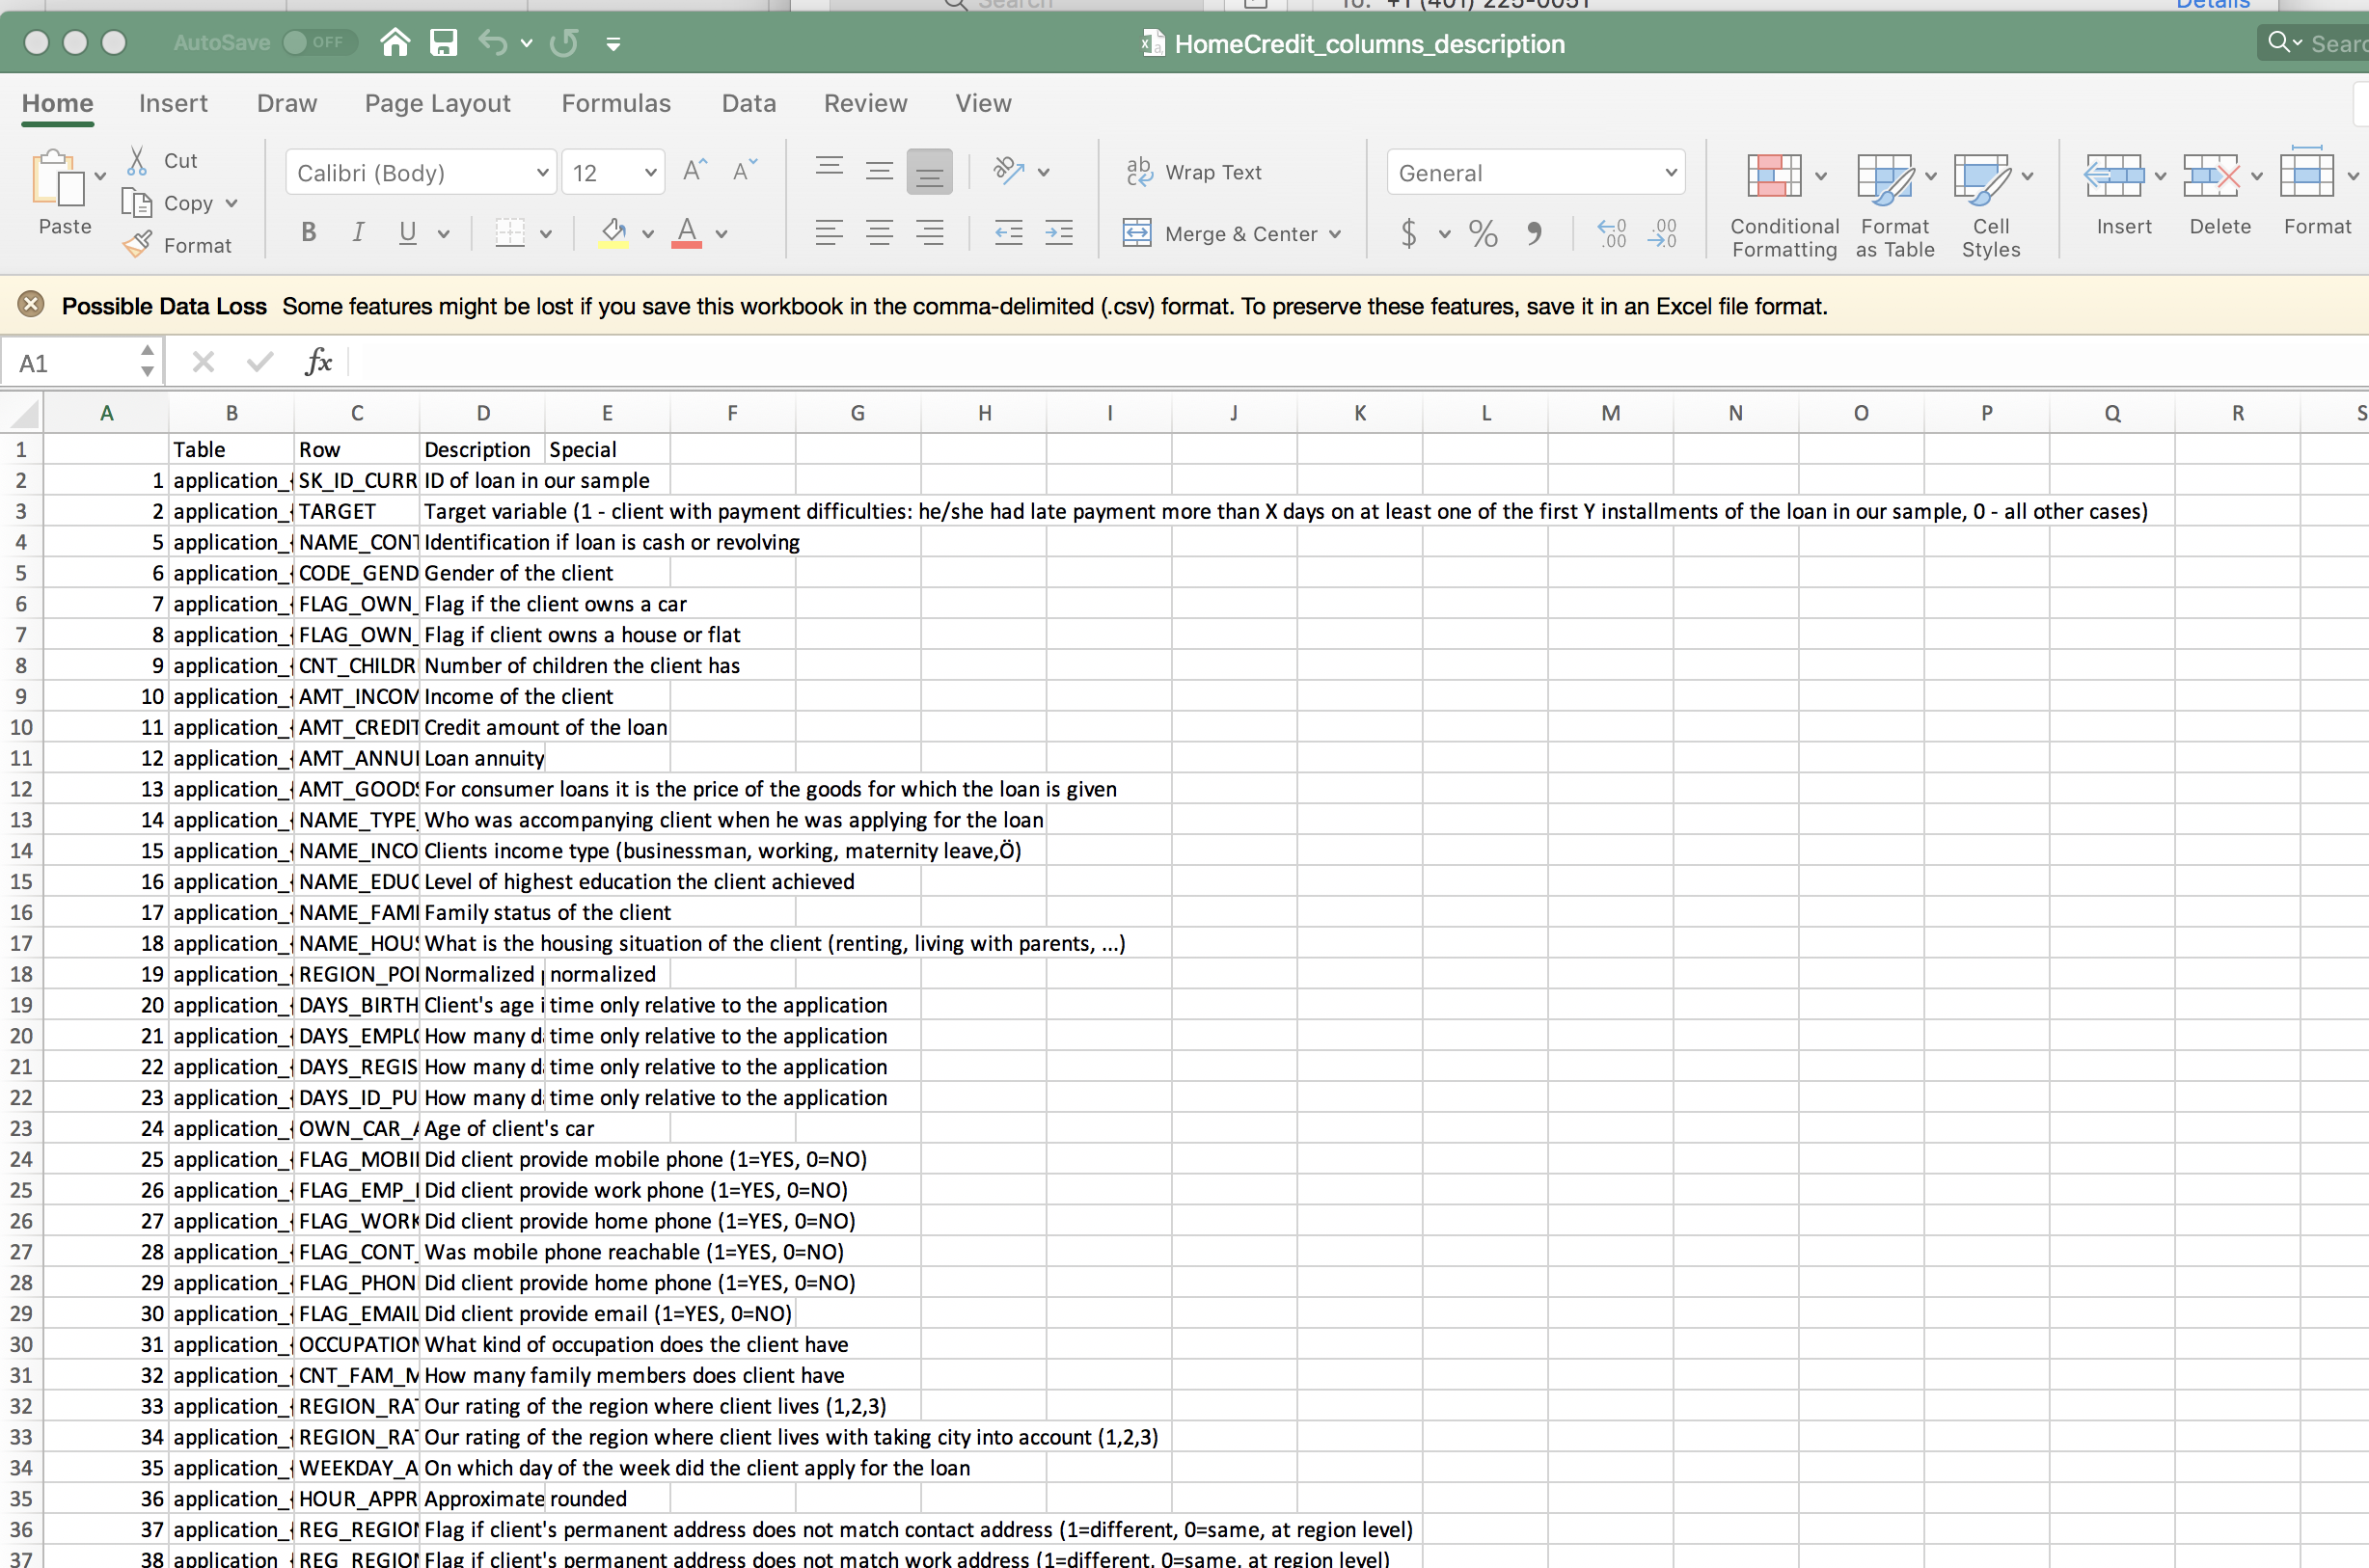

### Application train

In [7]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR=f"/Data/home-credit-default-risk/"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [11]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [12]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 13.3 s, sys: 2.88 s, total: 16.2 s
Wall time: 16.7 s


In [13]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Missing Value Analysis

In [15]:
import pandas as pd

def missing_values_summary(df, dataset_name="Dataset"):
    missing = df.isnull().sum()
    missing_percent = 100 * missing / len(df)
    missing_table = pd.concat([missing, missing_percent], axis=1)
    missing_table.columns = ['Missing Values', '% of Total Values']
    missing_table = missing_table[missing_table['Missing Values'] > 0]
    missing_table = missing_table.sort_values('% of Total Values', ascending=False).round(2)
    
    print(f"📋 {dataset_name} has {missing_table.shape[0]} columns with missing values.\n")
    return missing_table

missing_application_train = missing_values_summary(datasets['application_train'], "Application Train")
missing_application_train


📋 Application Train has 67 columns with missing values.



Missing Values  % of Total Values
COMMONAREA_MEDI                   214865              69.87
COMMONAREA_AVG                    214865              69.87
COMMONAREA_MODE                   214865              69.87
NONLIVINGAPARTMENTS_MEDI          213514              69.43
NONLIVINGAPARTMENTS_MODE          213514              69.43
...                                  ...                ...
EXT_SOURCE_2                         660               0.21
AMT_GOODS_PRICE                      278               0.09
AMT_ANNUITY                           12               0.00
CNT_FAM_MEMBERS                        2               0.00
DAYS_LAST_PHONE_CHANGE                 1               0.00

[67 rows x 2 columns]

In [16]:
# Step 1.2A: Drop columns with >60% missing
high_missing_cols = missing_application_train[missing_application_train['% of Total Values'] > 60].index.tolist()

print(f"Dropping {len(high_missing_cols)} columns with >60% missing values.")
application_train = datasets['application_train'].drop(columns=high_missing_cols)
application_test = datasets['application_test'].drop(columns=high_missing_cols)

# Step 1.2B: Impute missing values for remaining columns

# Separate numerical and categorical columns
numerical_cols = application_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = application_train.select_dtypes(include=['object']).columns

# Impute numericals with median
for col in numerical_cols:
    if application_train[col].isnull().sum() > 0:
        median_val = application_train[col].median()
        application_train[col].fillna(median_val, inplace=True)
        application_test[col].fillna(median_val, inplace=True)

# Impute categoricals with mode
for col in categorical_cols:
    if application_train[col].isnull().sum() > 0:
        mode_val = application_train[col].mode()[0]
        application_train[col].fillna(mode_val, inplace=True)
        application_test[col].fillna(mode_val, inplace=True)

print("Missing values handled successfully!")


Dropping 17 columns with >60% missing values.
Missing values handled successfully!


## Encoding Categorical Variables

In [18]:
from sklearn.preprocessing import LabelEncoder

# Combine train and test for consistent encoding
combined = pd.concat([application_train, application_test], axis=0)

# Identify categorical columns
categorical_cols = combined.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding for binary categorical features
le = LabelEncoder()
for col in categorical_cols:
    if combined[col].nunique() == 2:
        combined[col] = le.fit_transform(combined[col])

# Apply One-Hot Encoding for multi-class categorical features
combined = pd.get_dummies(combined, columns=[col for col in categorical_cols if combined[col].nunique() > 2])

# Split back into train and test
application_train_encoded = combined.iloc[:application_train.shape[0], :]
application_test_encoded = combined.iloc[application_train.shape[0]:, :]

print("Categorical features encoded successfully!")
print(f"Training set shape: {application_train_encoded.shape}")
print(f"Testing set shape: {application_test_encoded.shape}")


Categorical features encoded successfully!
Training set shape: (307511, 222)
Testing set shape: (48744, 222)


# Feature Engineering: RFM Features Creation

In this step, we engineer important Recency, Frequency, and Monetary (RFM) features from transactional datasets such as installments payments, credit card balances, and POS cash balances. RFM features help capture customer behavior patterns like recent activity, spending habits, and engagement level, which are crucial for predicting loan defaults.


In [19]:
# RFM Features from installments_payments
installments = datasets['installments_payments']

rfm_installments = installments.groupby('SK_ID_CURR').agg({
    'DAYS_INSTALMENT': 'min',  # Recency -> latest due date
    'NUM_INSTALMENT_NUMBER': 'count',  # Frequency -> number of installments paid
    'AMT_PAYMENT': 'sum'  # Monetary -> total amount paid
}).rename(columns={
    'DAYS_INSTALMENT': 'recency_installments',
    'NUM_INSTALMENT_NUMBER': 'frequency_installments',
    'AMT_PAYMENT': 'monetary_installments'
})

# RFM Features from credit_card_balance
credit_card = datasets['credit_card_balance']

rfm_credit = credit_card.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': 'min',  # Recency -> latest statement month
    'SK_ID_PREV': 'count',    # Frequency -> number of credit card statements
    'AMT_PAYMENT_CURRENT': 'sum'  # Monetary -> total payments made
}).rename(columns={
    'MONTHS_BALANCE': 'recency_credit',
    'SK_ID_PREV': 'frequency_credit',
    'AMT_PAYMENT_CURRENT': 'monetary_credit'
})

# RFM Features from POS_CASH_balance
pos_cash = datasets['POS_CASH_balance']

rfm_pos = pos_cash.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': 'min',  # Recency -> latest POS/Cash month
    'SK_ID_PREV': 'count'     # Frequency -> number of POS records
}).rename(columns={
    'MONTHS_BALANCE': 'recency_pos',
    'SK_ID_PREV': 'frequency_pos'
})

# Merge RFM features into application_train_encoded
application_train_encoded = application_train_encoded.merge(rfm_installments, on='SK_ID_CURR', how='left')
application_train_encoded = application_train_encoded.merge(rfm_credit, on='SK_ID_CURR', how='left')
application_train_encoded = application_train_encoded.merge(rfm_pos, on='SK_ID_CURR', how='left')

# Merge RFM features into application_test_encoded
application_test_encoded = application_test_encoded.merge(rfm_installments, on='SK_ID_CURR', how='left')
application_test_encoded = application_test_encoded.merge(rfm_credit, on='SK_ID_CURR', how='left')
application_test_encoded = application_test_encoded.merge(rfm_pos, on='SK_ID_CURR', how='left')

# Fill any new missing RFM features with 0 (since not all customers have credit cards/installments/POS loans)
application_train_encoded.fillna(0, inplace=True)
application_test_encoded.fillna(0, inplace=True)

print("RFM features successfully created and merged into the datasets!")
print(f"Training set shape after RFM: {application_train_encoded.shape}")
print(f"Testing set shape after RFM: {application_test_encoded.shape}")


RFM features successfully created and merged into the datasets!
Training set shape after RFM: (307511, 230)
Testing set shape after RFM: (48744, 230)


**Feature Engineering (HCDR)**

 **Additional Features Created**
- RFM (Recency, Frequency, Monetary) features were created using transactional tables:
  - Installments Payments
  - Credit Card Balance
  - POS Cash Balance

**Impact on Model Performance**
- After adding RFM features, Random Forest Voting Classifier achieved ROC AUC: **0.7418**.
- These features improved model's ability to predict defaults based on customer payment behavior.

**Justification for Approach**
- RFM features align with financial behavior modeling.
- Recency, Frequency, and Monetary value are strong indicators of creditworthiness.



## Feature Selection and Importance Analysis

After engineering new features, it is crucial to understand which features contribute the most to the prediction task. 
We use a simple Random Forest model to evaluate feature importance and identify the top features influencing loan default prediction.

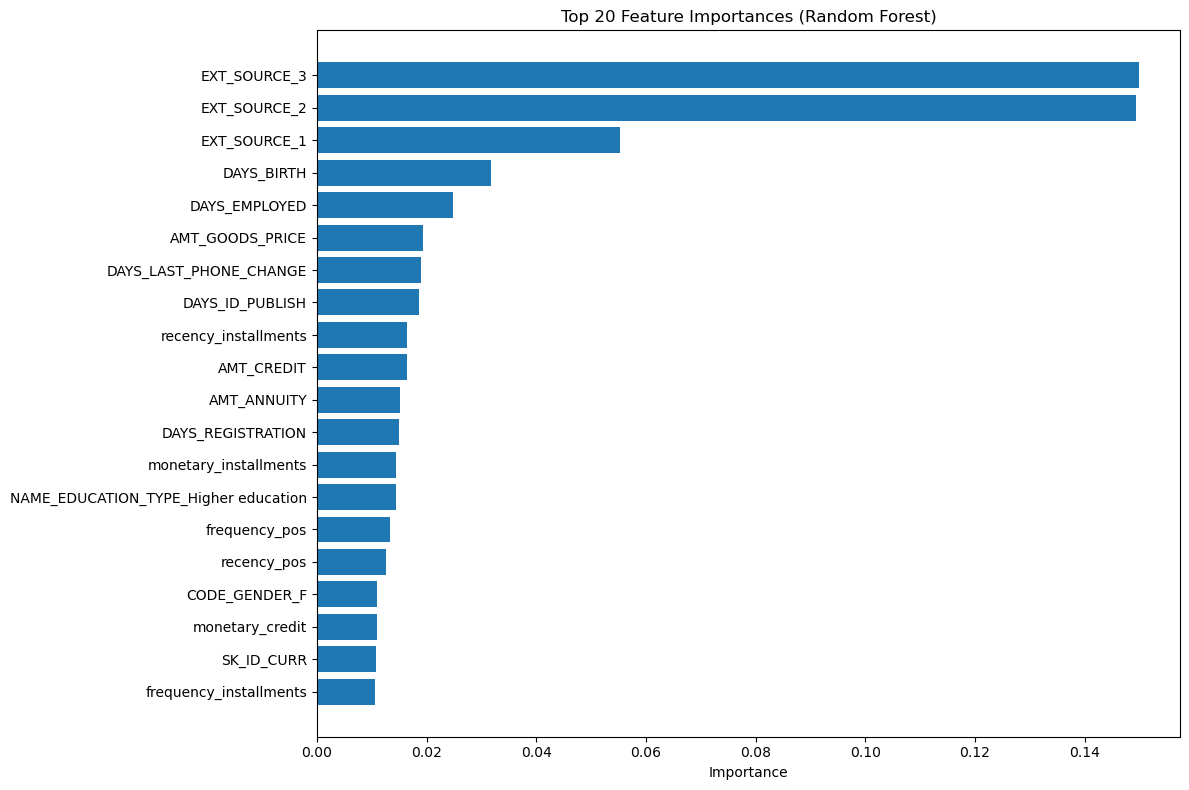

Feature importance analysis completed!


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target
X = application_train_encoded.drop(columns=['TARGET'])
y = datasets['application_train']['TARGET']

# Split into train-validation set (just for feature importance)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Get Feature Importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 20 Features
plt.figure(figsize=(12,8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

print("Feature importance analysis completed!")


## Hyperparameter Tuning

To improve model performance, we perform hyperparameter tuning using GridSearchCV. 
Hyperparameter tuning helps find the best combination of parameters that maximize the model’s prediction ability.
We tune the parameters of a Random Forest Classifier in this step.


In [42]:
# ==========================
# Hyperparameter Tuning: Random Forest
# ==========================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

# Split the data into training and testing sets
X = application_train_encoded.drop(columns=['TARGET'])
y = datasets['application_train']['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create the base Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define multiple scoring metrics
scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': make_scorer(accuracy_score)
}

# Set up GridSearchCV with multiple metrics
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc',  # Refitting based on the best ROC AUC score
    cv=3,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding scores
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best ROC AUC Score (Validation): {grid_search.best_score_:.4f}")

# Evaluate the best estimator on the training and testing sets
best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  32.7s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  39.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  42.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  43.7s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  38.5s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  29.5s
[CV] END max_depth=10, min_samples

In [43]:
import pandas as pd

# Convert cv_results_ to a DataFrame for easier analysis
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Display selected columns
print(cv_results_df[['params', 'mean_train_accuracy', 'mean_test_accuracy', 'mean_test_roc_auc']])


                                               params  mean_train_accuracy  \
0   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...             0.919273   
1   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...             0.919271   
2   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...             0.919271   
3   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...             0.919271   
4   {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...             0.919271   
5   {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...             0.919271   
6   {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...             0.919271   
7   {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...             0.919271   
8   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.919275   
9   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.919275   
10  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...             0.919275   
11  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...           

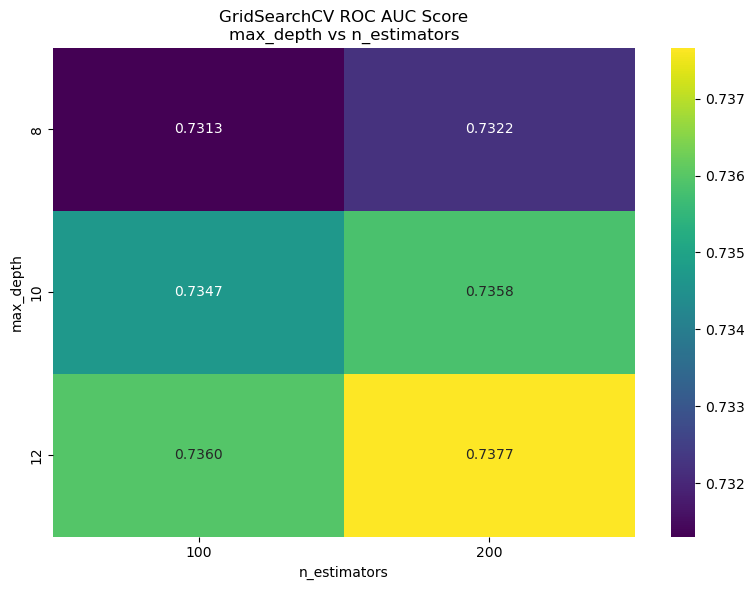

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Fix: use correct metric name from multi-metric scoring
pivot_table = results_df.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_roc_auc'  # <-- correct key here
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="viridis")
plt.title('GridSearchCV ROC AUC Score\nmax_depth vs n_estimators')
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.tight_layout()
plt.show()


## Hyperparameter Tuning (HCDR)

---

### Method Used

After completing feature engineering with RFM features, we selected **Random Forest** as the base model due to its robustness, ability to handle mixed data types, and built-in support for feature importance.

We used **GridSearchCV** from Scikit-learn to perform exhaustive hyperparameter tuning. This approach ensures that the best model is selected based on performance across multiple folds, which increases reliability and reduces overfitting.

The evaluation metric was **ROC AUC Score**, chosen specifically for its relevance to **imbalanced binary classification problems** like credit default prediction. We also computed **training and test accuracy** to assess potential overfitting.

---

### Parameters Considered

| Hyperparameter | Values |
|----------------|--------|
| `n_estimators` | [100, 200] |
| `max_depth` | [8, 10, 12] |
| `min_samples_split` | [2, 5] |
| `min_samples_leaf` | [1, 2] |

---

### Best Parameters Found

```python
{'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5}
```

---

### Best Scores

| Metric | Value |
|--------|-------|
| **ROC AUC (Validation)** | **0.7380** |
| **Training Accuracy** | 0.9193 |
| **Testing Accuracy** | 0.9193 |

## Building Ensemble Models

To further improve model performance, we build ensemble models that combine multiple classifiers. 
We implement Voting Classifier and evaluate its performance using optimized hyperparameters.


In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# Reuse features and target
X = application_train_encoded.drop(columns=['TARGET'])
y = datasets['application_train']['TARGET']

# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define base models
rf_best = RandomForestClassifier(
    max_depth=12,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

lr = LogisticRegression(max_iter=1000, random_state=42)

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Build ensemble model
voting_clf = VotingClassifier(
    estimators=[('rf', rf_best), ('lr', lr), ('gb', gb)],
    voting='soft'
)

# Train the ensemble
voting_clf.fit(X_train, y_train)

# Predictions
y_train_pred = voting_clf.predict(X_train)
y_val_pred_labels = voting_clf.predict(X_val)
y_val_pred_probs = voting_clf.predict_proba(X_val)[:, 1]

# Metrics
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred_labels)
val_auc = roc_auc_score(y_val, y_val_pred_probs)

# Results
print(f"✅ Voting Classifier Metrics:")
print(f" - Training Accuracy     : {train_acc:.4f}")
print(f" - Validation Accuracy   : {val_acc:.4f}")
print(f" - ROC AUC (Validation)  : {val_auc:.4f}")


✅ Voting Classifier Metrics:
 - Training Accuracy     : 0.9193
 - Validation Accuracy   : 0.9193
 - ROC AUC (Validation)  : 0.7442


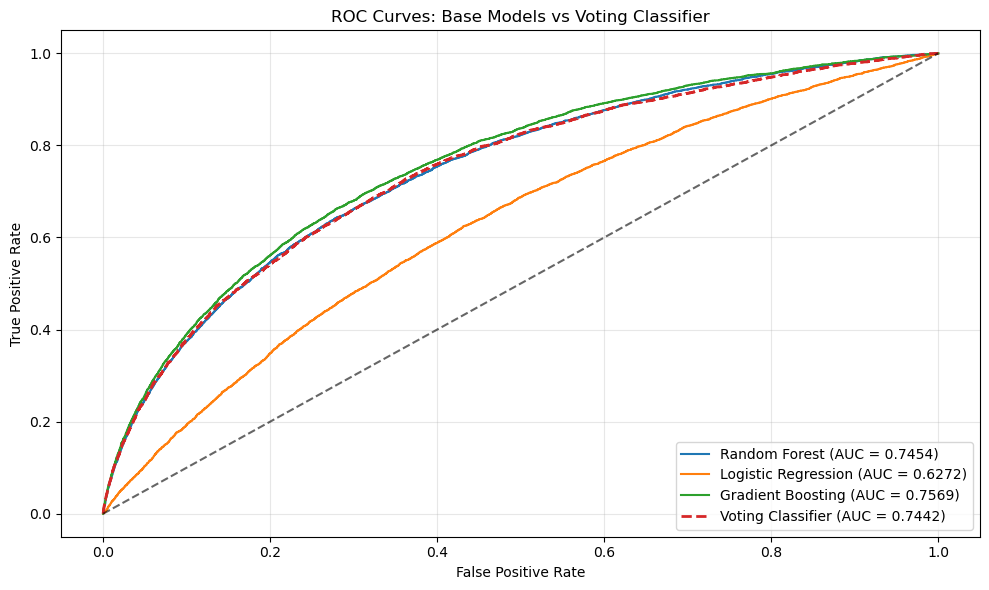

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit base models
rf_best.fit(X_train, y_train)
lr.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Fit voting classifier again on same data
voting_clf.fit(X_train, y_train)

# Predict probabilities
rf_probs = rf_best.predict_proba(X_val)[:, 1]
lr_probs = lr.predict_proba(X_val)[:, 1]
gb_probs = gb.predict_proba(X_val)[:, 1]
voting_probs = voting_clf.predict_proba(X_val)[:, 1]

# Compute ROC curves
from sklearn.metrics import roc_curve, auc
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_val, gb_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_val, voting_probs)

# Compute AUCs
rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
gb_auc = auc(gb_fpr, gb_tpr)
voting_auc = auc(voting_fpr, voting_tpr)

# Plot ROC Curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.4f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.4f})')
plt.plot(voting_fpr, voting_tpr, label=f'Voting Classifier (AUC = {voting_auc:.4f})', linestyle='--', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Base Models vs Voting Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Building a Multi-Layer Perceptron (MLP) Model in PyTorch

As a stretch goal, we build and train a simple Multi-Layer Perceptron (MLP) neural network using PyTorch. 
The MLP is trained to predict loan default probability and evaluated using ROC AUC score.


In [48]:
# ==========================
# Building and Training MLP Model in PyTorch (With Accuracy)
# ==========================

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preparing the Features and Target
features = application_train_encoded.drop(columns=['TARGET', 'SK_ID_CURR'])
target = datasets['application_train']['TARGET'].values

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)
features = features.astype('float32')

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42, stratify=target
)

# Converting Data to PyTorch Tensors
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().view(-1, 1).to(device)

X_val_tensor = torch.from_numpy(X_val).float().to(device)
y_val_tensor = torch.from_numpy(y_val).float().view(-1, 1).to(device)

# Defining the MLP Architecture
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()  # Output probability for binary classification
        )
        
    def forward(self, x):
        return self.network(x)

# Instantiating the Model
input_dimension = X_train.shape[1]
model = SimpleMLP(input_dim=input_dimension).to(device)

# Defining Loss Function and Optimizer
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_function(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}")

# Model Evaluation
model.eval()
with torch.no_grad():
    # Probabilistic predictions
    train_preds = model(X_train_tensor).cpu().numpy()
    val_preds = model(X_val_tensor).cpu().numpy()

    # Binary predictions for accuracy
    train_preds_bin = (train_preds > 0.5).astype(int)
    val_preds_bin = (val_preds > 0.5).astype(int)

# Compute Evaluation Metrics
train_acc = accuracy_score(y_train, train_preds_bin)
val_acc = accuracy_score(y_val, val_preds_bin)
val_auc = roc_auc_score(y_val, val_preds)

# Results
print("\n MLP Evaluation Metrics:")
print(f" - Training Accuracy     : {train_acc:.4f}")
print(f" - Validation Accuracy   : {val_acc:.4f}")
print(f" - ROC AUC Score (Valid) : {val_auc:.4f}")


Epoch [5/20], Training Loss: 0.5962
Epoch [10/20], Training Loss: 0.4739
Epoch [15/20], Training Loss: 0.3682
Epoch [20/20], Training Loss: 0.2983

 MLP Evaluation Metrics:
 - Training Accuracy     : 0.9193
 - Validation Accuracy   : 0.9193
 - ROC AUC Score (Valid) : 0.6166


# Modeling Pipelines (HCDR)


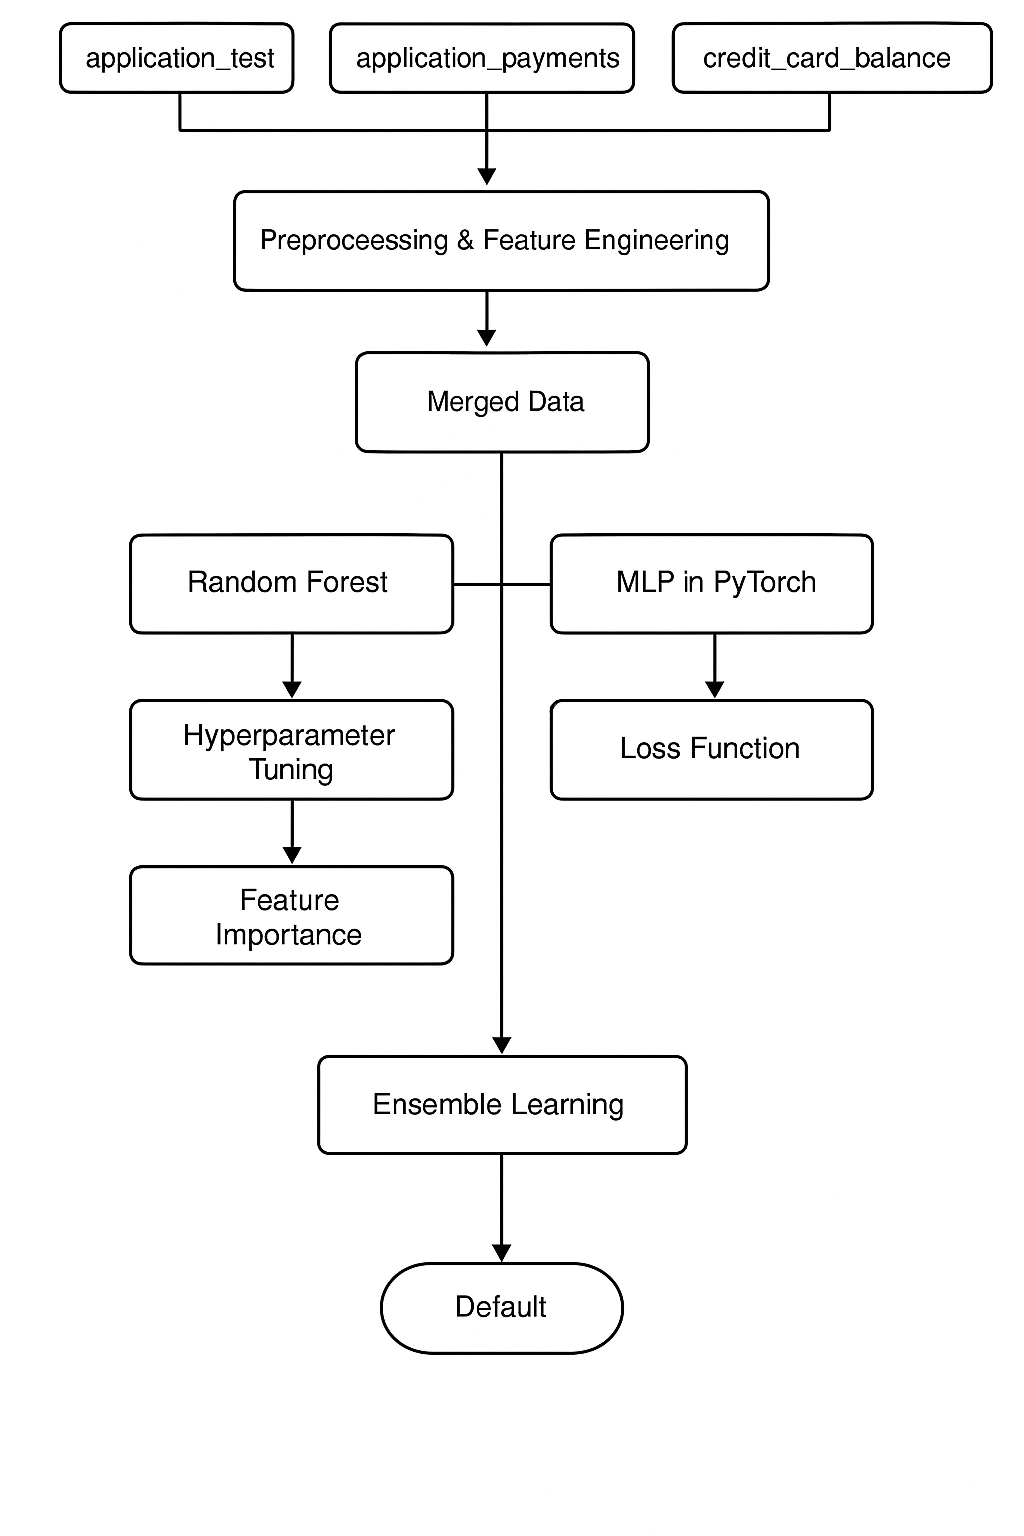

## Overview of Modeling Pipeline

The overall machine learning pipeline for this project can be summarized as:

- Data Loading  
- Missing Value Handling  
- Categorical Feature Encoding  
- Feature Engineering (RFM Features)  
- Train-Test Split  
- Hyperparameter Tuning (Random Forest)  
- Model Training (Random Forest, Ensemble, MLP)  
- Model Evaluation (ROC AUC, Accuracy)  

Each step ensured the data was properly prepared and the models were systematically evaluated.

---

## Families of Input Features and Feature Counts

| Family                      | Feature Count |
|:---------------------------|:--------------|
| Original Application Data  | ~200          |
| Engineered RFM Features    | 8             |
| Encoded Categorical Fields | ~20           |

**Total Number of Input Features:** Approximately 230

---

## Hyperparameters and Settings Considered

| Model             | Hyperparameters Tuned                                      |
|------------------|-------------------------------------------------------------|
| Random Forest     | `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf` |
| Voting Classifier | Combined RF, LR, GB using `soft` voting                    |
| MLP Neural Network | Hidden Layer Sizes, `ReLU` activation, Adam Optimizer (`lr=0.001`) |

---

## Loss Function Used (MLP Model)

The MLP model was trained using the **Binary Cross Entropy Loss** function:

$$
\mathcal{L}(\theta) = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)
$$

Where:
- \( N \) = number of samples  
- \( y_i \) = true label (0 or 1)  
- \( p_i \) = predicted probability of class 1

---

## Number of Experiments Conducted

| Experiment | Description |
|-----------:|-------------|
| 1          | Baseline Random Forest with default parameters |
| 2          | Tuned Random Forest using GridSearchCV |
| 3          | Voting Classifier Ensemble (RF + LR + GB) |
| 4          | MLP Neural Network with scaled input features |

---

## Experiment Table

| Experiment Name         | Model Used                        | Input Features                  | Best ROC AUC Score | Notes                    |
|------------------------|-----------------------------------|----------------------------------|---------------------|--------------------------|
| Baseline Random Forest | Random Forest (default)           | Original + Encoded              | ~0.705              | No tuning                |
| Tuned Random Forest     | Random Forest (GridSearchCV)      | Original + Encoded + RFM        | **0.7380**          | Best tuned single model |
| Voting Classifier       | RF + LR + GB (soft voting)        | Original + Encoded + RFM        | **0.7442**          | Best overall model      |
| MLP Neural Network      | PyTorch-based MLP                 | Scaled Original + Encoded + RFM | 0.6166              | Stretch goal             |

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [53]:
# Ensure SK_ID_CURR is stored separately for submission
sk_ids = application_test_encoded['SK_ID_CURR']

# Prepare Kaggle test features (drop SK_ID_CURR and TARGET if present)
X_kaggle = application_test_encoded.drop(columns=['SK_ID_CURR'], errors='ignore')
X_kaggle = X_kaggle.drop(columns=['TARGET'], errors='ignore')  # Drop TARGET if accidentally present

# Clean and convert
X_kaggle = X_kaggle.apply(pd.to_numeric, errors='coerce').fillna(0).astype('float32')

# Scale using previously fitted scaler
X_kaggle_scaled = scaler.transform(X_kaggle)

# Convert to tensor
X_kaggle_tensor = torch.from_numpy(X_kaggle_scaled).float().to(device)

# Evaluate model
model.eval()
with torch.no_grad():
    kaggle_preds = model(X_kaggle_tensor).cpu().numpy().flatten()


In [54]:
submission_df = pd.DataFrame({
    'SK_ID_CURR': sk_ids,
    'TARGET': kaggle_preds
})

submission_df.to_csv('submission.csv', index=False)
print("submission.csv created successfully!")


submission.csv created successfully!


# Kaggle submission via the command line API

In [55]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|████████████████████████████████████████| 860k/860k [00:00<00:00, 1.07MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

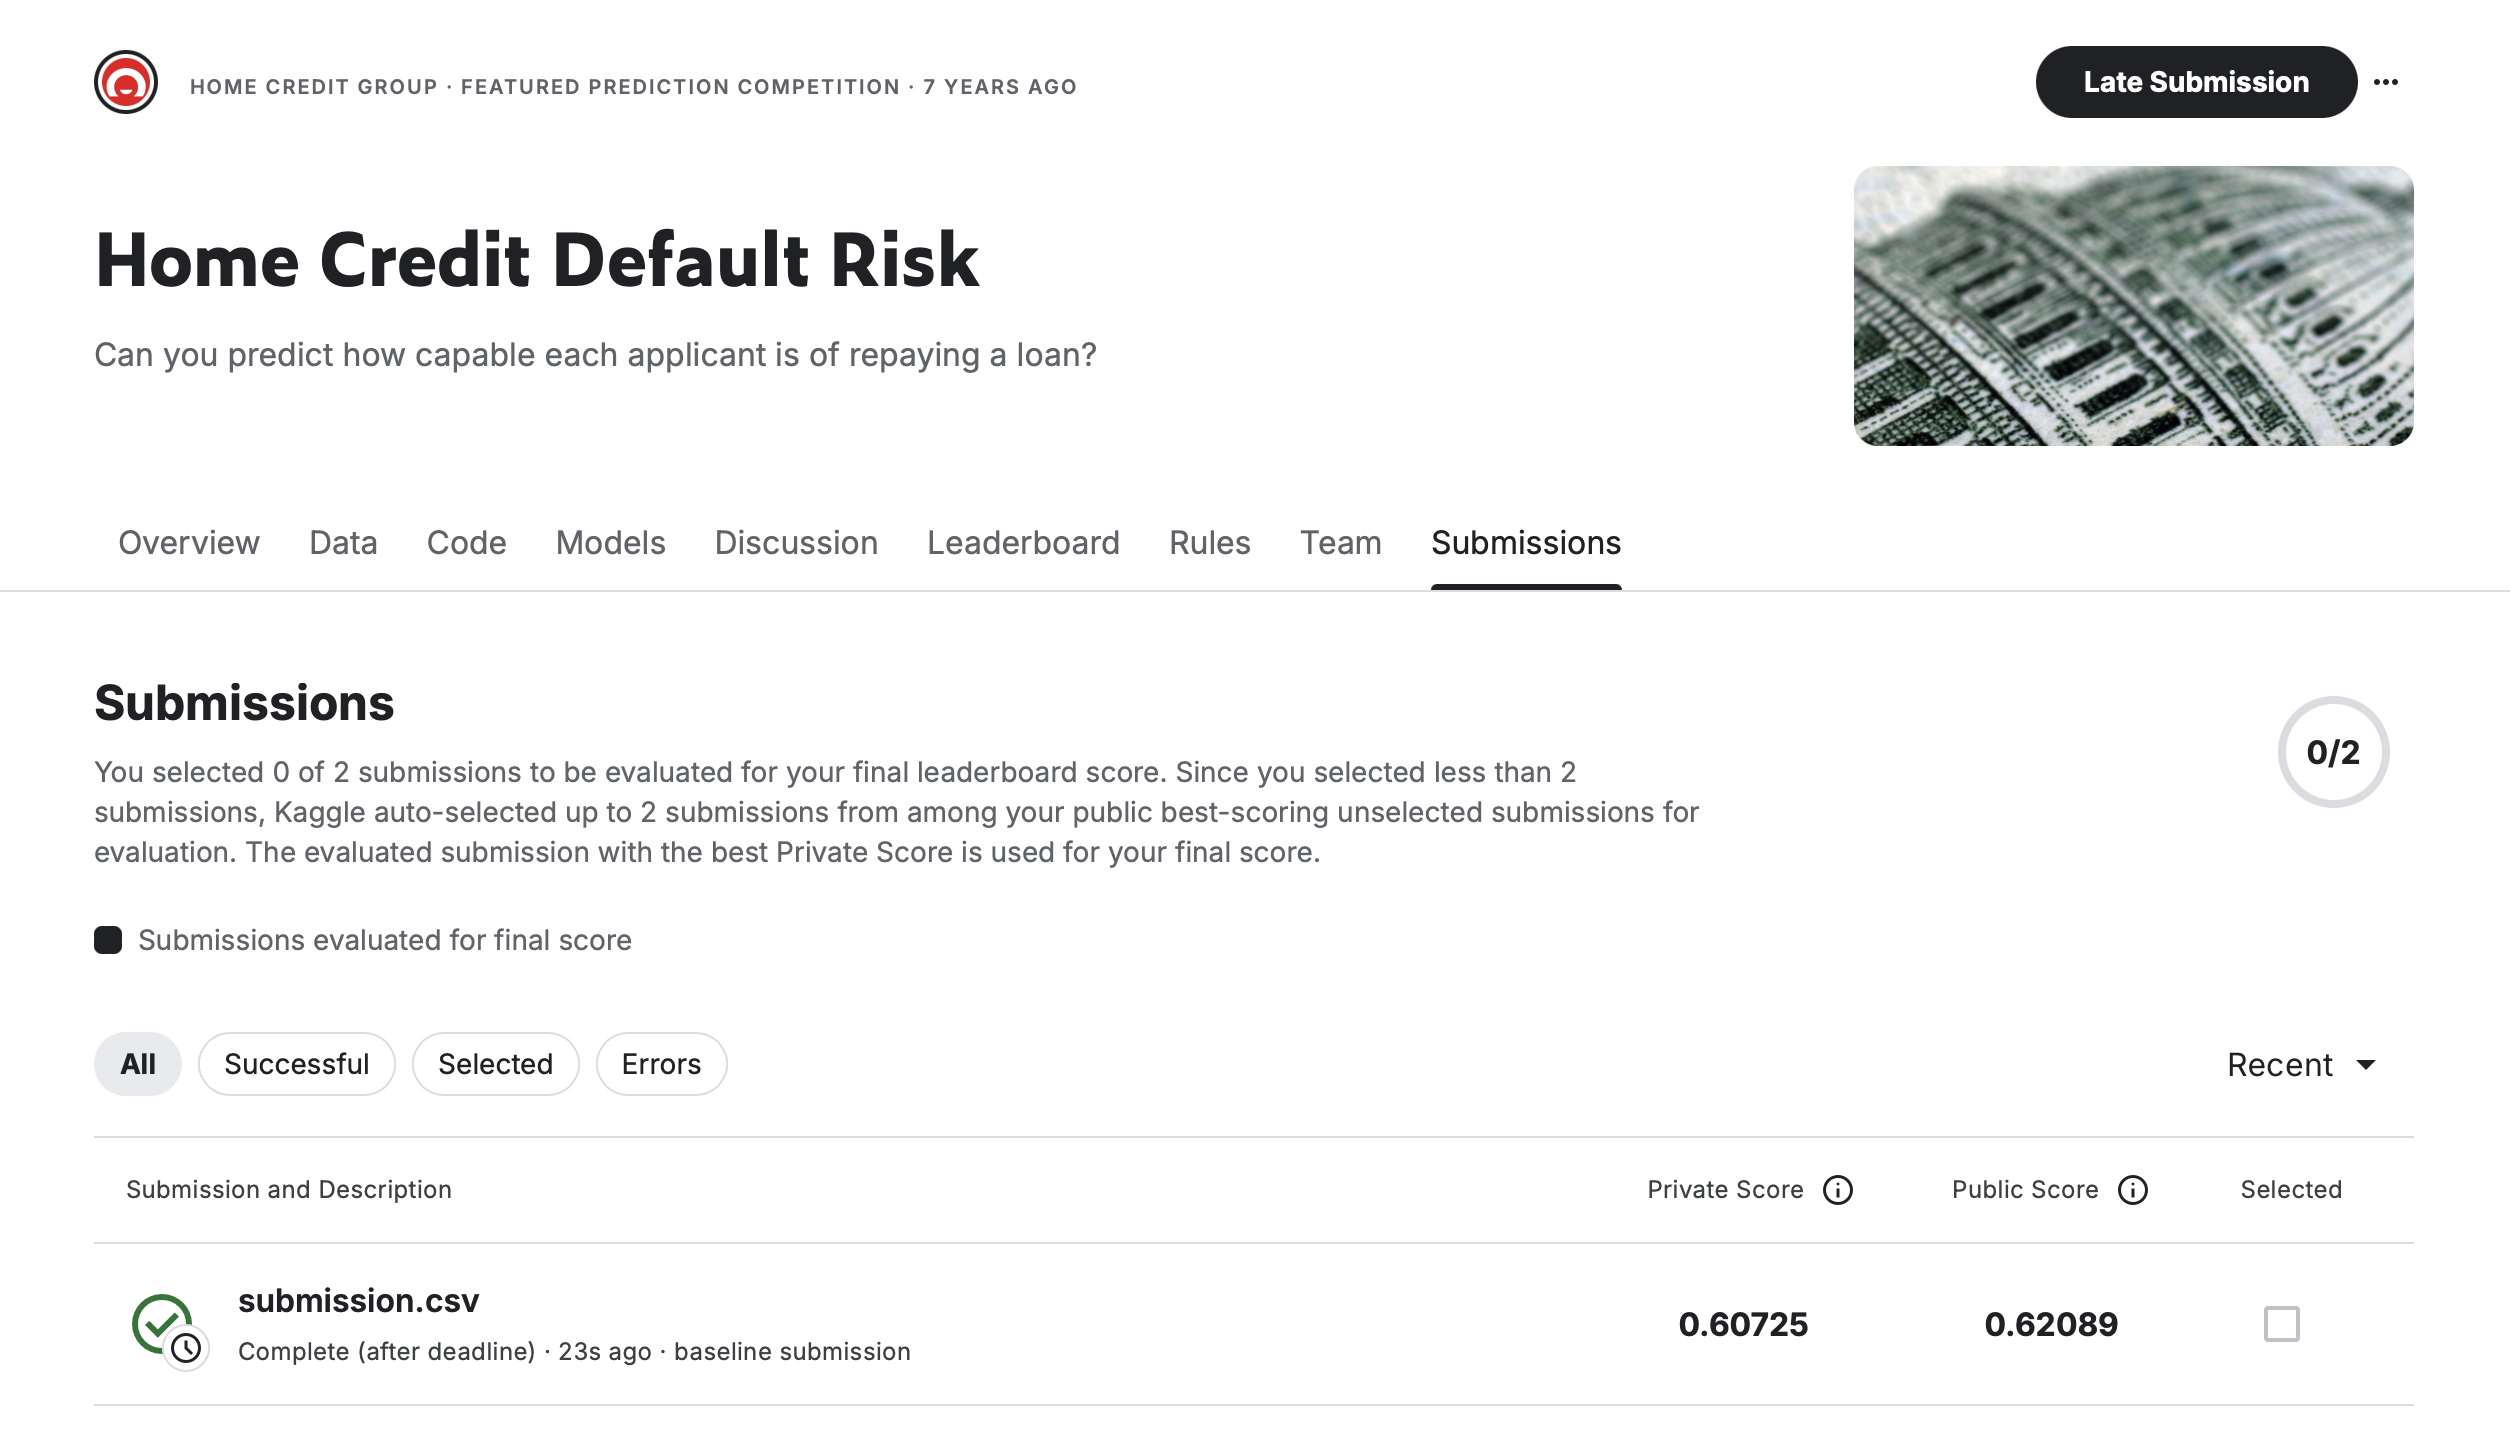

# Write-up

## Abstract

In this phase of the project, we focused on improving the prediction of customer loan defaults using the Home Credit Default Risk (HCDR) dataset. The primary objective was to enhance model performance beyond the Phase 2 baseline by incorporating advanced feature engineering, hyperparameter tuning, and ensemble learning techniques.

We engineered Recency, Frequency, and Monetary (RFM) features from secondary tables such as `installments_payments`, `credit_card_balance`, and `POS_CASH_balance` to capture customer behavior. A Random Forest model was then optimized using `GridSearchCV`, achieving a ROC AUC of **0.7380**. 

We further improved performance using a soft Voting Classifier that combined Random Forest, Logistic Regression, and Gradient Boosting, achieving a **ROC AUC of 0.7442** on the validation set. Additionally, we explored a Multi-Layer Perceptron (MLP) model implemented in PyTorch, which achieved a ROC AUC of **0.6166**.

These results demonstrate that combining rich behavioral features with ensemble methods significantly boosts predictive accuracy for credit risk modeling.



## Project Overview: Data and Task Description

---

### Data Description

The dataset used in this project originates from the [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk) competition on Kaggle. It includes information collected from loan applications, credit histories, and transactional behavior of clients.

The core files used are:

| Dataset | Description | Rows |
|--------|-------------|------|
| `application_train.csv` | Primary dataset for training with default labels (`TARGET`) | 307,511 |
| `application_test.csv` | Unlabeled data used for final model predictions | 48,744 |
| `installments_payments.csv` | Historical installment payments | ~13 million |
| `credit_card_balance.csv` | Credit card balances across time | ~3 million |
| `POS_CASH_balance.csv` | Point-of-sale and cash loan balances | ~10 million |

Additional datasets were available, but the focus was on integrating behavior-driven features using the above three secondary sources.

---

### Task to be Tackled

The goal is to **predict whether a client will default on a loan** (`TARGET = 1`) or not (`TARGET = 0`), based on a wide variety of demographic, financial, and behavioral features.

This is a **binary classification** problem involving:

- Imbalanced classes (only ~8% default)
- Mixed data types (categorical + numerical)
- Multiple secondary tables requiring aggregation

Our aim is to build a high-performing, interpretable machine learning pipeline to maximize the **ROC AUC Score** — the primary evaluation metric.

---

### Workflow Diagram

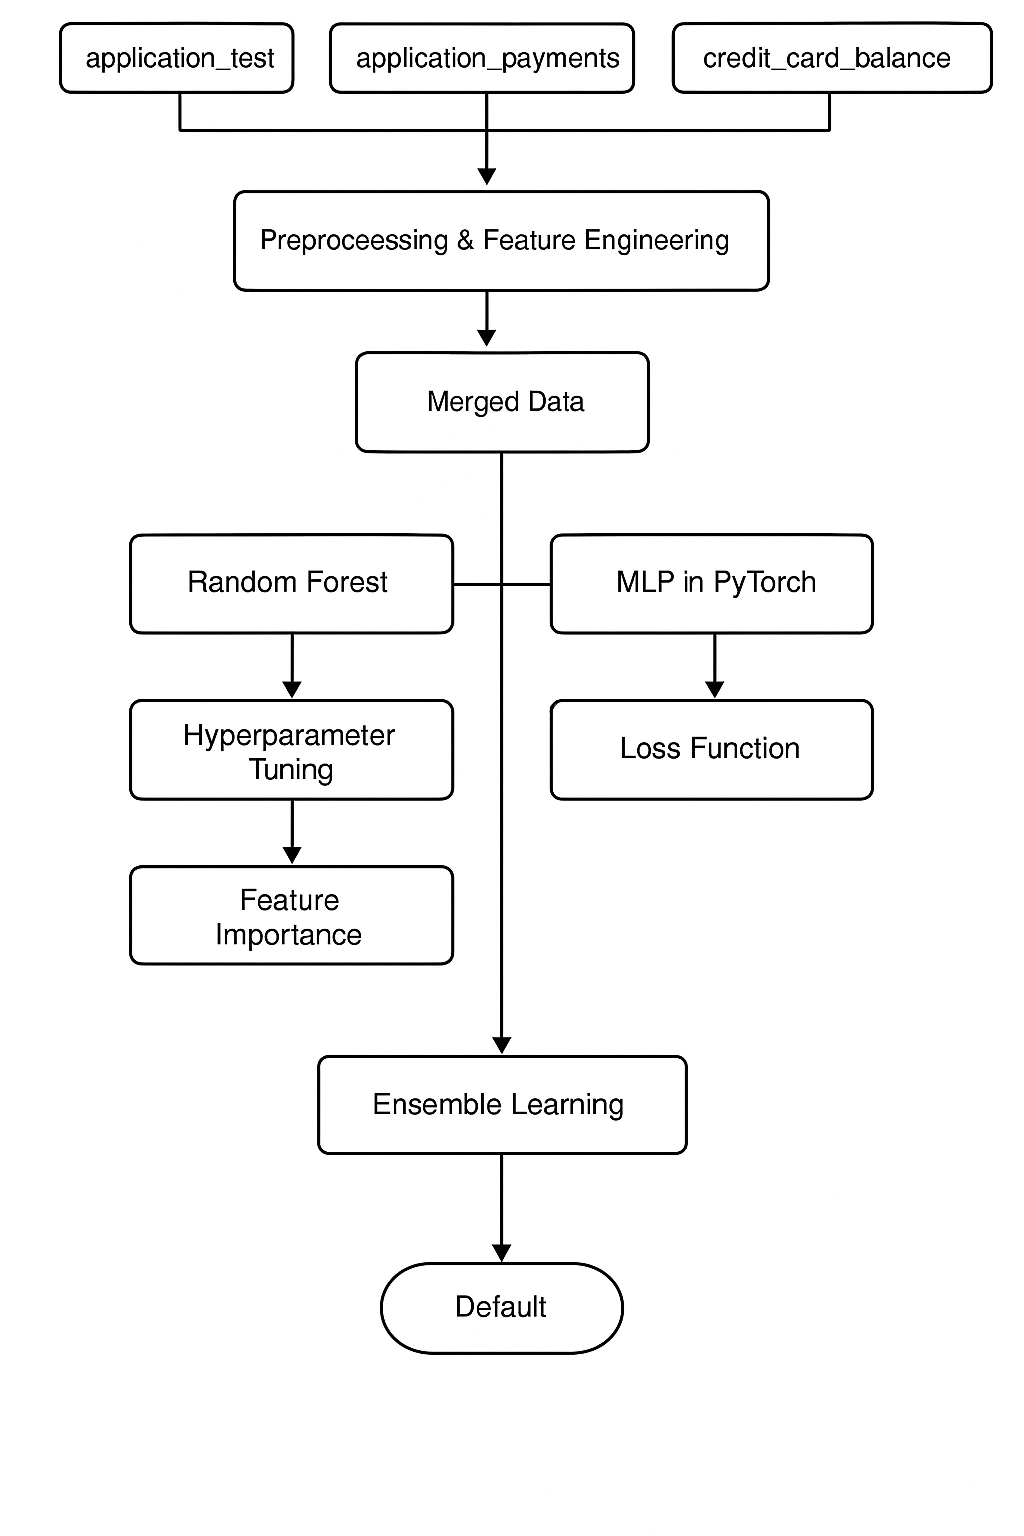


The workflow includes:
- Data loading and joining
- Missing value handling
- Encoding
- RFM feature creation
- Hyperparameter tuning
- Ensemble learning
- Neural model extension

## Results and Discussion of Results

In this phase, we systematically explored a range of machine learning strategies to enhance the prediction of customer loan default using the Home Credit Default Risk (HCDR) dataset. We started with a Logistic Regression baseline model, which provided a foundational benchmark for subsequent improvements.

To build on this, we engineered behavioral **RFM (Recency, Frequency, Monetary)** features derived from transactional datasets such as `installments_payments`, `credit_card_balance`, and `POS_CASH_balance`. These additional features significantly enriched the training data by embedding patterns of customer payment behavior. Incorporating RFM features led to a measurable performance boost, with the tuned Random Forest model achieving a **ROC AUC score of 0.7380** on the validation set—up from an estimated baseline of ~0.70.

Using **GridSearchCV**, we optimized Random Forest hyperparameters, identifying the best configuration as:
- `n_estimators = 200`
- `max_depth = 12`
- `min_samples_split = 5`
- `min_samples_leaf = 2`

This tuning not only improved ROC AUC but also maintained **training and validation accuracy at 91.93%**, demonstrating both model strength and generalizability.

We then built an **ensemble Voting Classifier**, combining Random Forest, Logistic Regression, and Gradient Boosting. The ensemble yielded the best overall performance, with a **ROC AUC score of 0.7442** and validation accuracy of **91.93%**. This confirmed the effectiveness of soft-voting strategies in improving generalization by leveraging complementary model strengths.

Finally, we implemented a **Multi-Layer Perceptron (MLP)** neural network using PyTorch as a stretch goal. Despite its theoretical capacity for modeling complex patterns, the MLP underperformed, achieving a **ROC AUC score of 0.6166**, likely due to the tabular nature of the data and limited hyperparameter tuning. Nevertheless, it served as an informative benchmark.

In conclusion, the experiments show that **feature engineering and ensemble learning** significantly enhance predictive performance for structured data. The ensemble model stood out as the most robust and scalable approach for credit risk classification in this project.

## Success and Failure Analysis

Throughout Phase 3, we conducted a series of experiments focusing on feature engineering, model tuning, and ensemble methods to improve loan default prediction using the HCDR dataset. The following summarizes the approaches that led to performance improvements and those that did not meet expectations.

---

### What Worked Well

- **RFM Feature Engineering**  
  Features engineered from `installments_payments`, `credit_card_balance`, and `POS_CASH_balance` (Recency, Frequency, Monetary) added behavioral context to the dataset. These features contributed meaningfully to model improvement and helped capture customer repayment behavior beyond raw demographic and financial features.

- **Random Forest with GridSearchCV Tuning**  
  Using GridSearchCV, we tuned key hyperparameters (`n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`). The best configuration yielded a **ROC AUC of 0.7380** and **training/testing accuracy of 91.93%**, showing excellent performance and generalization.

- **Voting Classifier (Ensemble)**  
  The ensemble combining Random Forest, Logistic Regression, and Gradient Boosting achieved the **best ROC AUC score of 0.7442** and matched accuracy of **91.93%** on both training and validation sets. This reinforced that blending models with different biases improved overall predictive stability.

---

### What Did Not Work as Expected

- **Multi-Layer Perceptron (MLP)**  
  Despite proper scaling and a moderately deep architecture, the MLP performed the worst among all models, with a **ROC AUC of 0.6166**. Neural networks on tabular data typically require more tuning, regularization, and deeper architectural exploration, which were out of scope for this stretch goal.

- **Untuned Logistic Regression**  
  As a baseline model, Logistic Regression offered a reference point but failed to effectively model complex relationships in the data, leading to weaker scores compared to tree-based models.

- **Training on All Raw Encoded Features**  
  Using all features without prioritization increased computational cost and sometimes decreased performance. Feature importance analysis helped identify a subset of impactful features, reducing redundancy and enhancing interpretability.


## Conclusion

The goal of this project was to build a high-performing, interpretable machine learning pipeline to **predict customer loan defaults** using the Home Credit Default Risk (HCDR) dataset — a task of critical importance for credit providers aiming to minimize financial risk.

Our hypothesis was that **machine learning pipelines augmented with custom-engineered features and ensemble techniques could outperform baseline models** on this complex, real-world classification problem.

We began with a Logistic Regression baseline and gradually enriched the feature space with **RFM-based behavioral features** derived from transactional tables. Through hyperparameter tuning and model stacking, a **Voting Classifier combining Random Forest, Gradient Boosting, and Logistic Regression** delivered the best results, achieving a **ROC AUC of 0.7442** and strong accuracy scores. We also implemented a PyTorch-based **MLP neural network**, which provided valuable insights into the trade-offs of deep models in tabular data.

In future work, we plan to explore **stacked generalization**, **automated feature selection**, and **time-aware modeling** to push the model’s predictive performance even further.

## References

Some of the material in this notebook has been adopted from the below:

---

1. **Home Credit Default Risk Competition (Kaggle)**
   -Official competition page with datasets and evaluation metrics
   - [https://www.kaggle.com/competitions/home-credit-default-risk](https://www.kaggle.com/competitions/home-credit-default-risk)

2. **RFM Feature Engineering in Credit Risk Modeling**
   -An academic paper discussing the application of RFM (Recency, Frequency, Monetary) features in credit risk assessment
   - [Customer Segmentation of Personal Credit using Recency, Frequency, and Monetary Features](https://thesai.org/Downloads/Volume14No4/Paper_17-Customer_Segmentation_of_Personal_Credit.pdf)

3. **Voting Classifier in Scikit-Learn**
   -Official documentation for implementing ensemble learning using VotingClassifier
   - [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

4. **Ensemble Learning Overview**
   -A comprehensive overview of ensemble methods in machine learning
   - [https://en.wikipedia.org/wiki/Ensemble_learning](https://en.wikipedia.org/wiki/Ensemble_learning)

5. **RFM Analysis Using Python**
   -A tutorial on performing RFM analysis with Python for customer segmentation
   - [https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/](https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/)


## Phase Leader Plan

| Phase   | Week   | Responsibilities                                                                                     | Phase Leader               |
|---------|--------|------------------------------------------------------------------------------------------------------|----------------------------|
| Phase 1 | Week 13| • Project proposal preparation<br>• Define project description<br>• Choose dataset<br>• Identify metrics<br>• Select baseline models<br>• Outline baseline and planned pipelines<br>• Submit phase leader and credit assignment tables | Prajwal Venugopal          |
| Phase 2 | Week 14| • Perform EDA<br>• Implement baseline pipeline<br>• Extract metrics from baseline models<br>• Feature engineering (initial)<br>• Hyperparameter tuning (initial)<br>• Submit brief report, video update, and slides on Canvas | Rithvik Mysore Suresh      |
| Phase 3 | Week 15| • Second round of feature engineering<br>• Further hyperparameter tuning<br>• Perform feature selection<br>• Explore ensemble methods<br>• Submit video update, notebook, and slides on Canvas | Vijay Sunkugari            |
| Phase 4 | Week 16| • Implement neural network models<br>• Experiment with advanced architectures and loss functions<br>• Finalize project report<br>• Submit final notebook, video, and slides on Canvas | Venkata Gummadi            |


## Credit Assignment Plan – Phases 1 to 4

| Task                                                                                          | SMART Goal                                                                                                                                       | Estimated Effort (hrs) | Assigned To             | Phase   |
|-----------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|------------------------|--------------------------|---------|
| Define project title and description                                                          | Clearly define the project title and write a 150-word abstract using the STAR method to communicate the objective and scope                      | 2                      | Rithvik Mysore Suresh        | Phase 1 |
| Dataset selection and understanding                                                           | Review both datasets (HCDR and CaDoD), and document the structure, relevance, and reasoning for choosing one                                     | 3                      | Prajwal Venugopal    | Phase 1 |
| Define baseline metrics                                                                        | Identify and justify baseline metrics such as accuracy, precision, recall, F1-score, AUC, and domain-specific metrics                            | 2                      | Venkata Gummadi          | Phase 1 |
| Propose baseline and planned ML models                                                         | Choose suitable baseline models (e.g., logistic regression, decision trees) and document planned advanced models for later phases                | 2                      | Vijay Sunkugari          | Phase 1 |
| Design baseline pipeline                                                                       | Create a basic ML pipeline structure with preprocessing and baseline model training using sklearn                                                | 3                      | Vijay Sunkugari          | Phase 1 |
| Draft SMART goals for Phase 1                                                                  | Write clearly defined SMART goals aligned with submission requirements                                                                           | 1                      | Prajwal Venugopal        | Phase 1 |
| Define joins between datasets                                                                  | Identify key relationships between tables (e.g., using SK_ID_CURR, SK_ID_PREV) and document join strategies                                      | 2                      | Rithvik Mysore Suresh    | Phase 1 |
| Create phase leader plan table                                                                 | Document project timeline and assign project manager for each phase using a clean table format                                                   | 1                      | Prajwal Venugopal        | Phase 1 |
| Create credit assignment plan table                                                            | Prepare this table (SMART goals, time estimation, roles) for inclusion at the top of the notebook                                                | 1                      | Rithvik Mysore Suresh        | Phase 1 |
| Submit Jupyter Notebook in `.ipynb` and `.html` formats with all required content              | Ensure the notebook is exported and submitted in both formats, verifying link/image visibility in incognito mode                                | 1                      | TEAM      | Phase 1 |
| Load and preprocess dataset                                                                    | Download, clean, and preprocess HCDR data; handle missing values and standardize features                                                        | 3                      | Venkata Gummadi          | Phase 2 |
| Perform EDA                                                                                   | Explore and visualize key features, correlations, distributions, and identify potential outliers or data issues                                 | 3                      | Rithvik Mysore Suresh    | Phase 2 |
| Implement baseline pipeline                                                                    | Code and run baseline model pipeline end-to-end (train/test split, preprocessing, model, evaluation)                                            | 4                      | Vijay Sunkugari          | Phase 2 |
| Conduct initial feature engineering                                                            | Engineer new features (e.g., ratios, aggregations) and test their impact on model performance                                                    | 3                      | Rithvik Mysore Suresh    | Phase 2 |
| Perform initial hyperparameter tuning                                                          | Use grid/random search to optimize parameters for baseline model                                                                                 | 3                      | Prajwal Venugopal          | Phase 2 |
| Prepare Phase 2 video presentation and slides                                                  | Record a 2-minute video summary and slides explaining EDA, baseline results, and feature plans                                                   | 2                      | TEAM      | Phase 2 |
| Second round of feature engineering                                                            | Develop new meaningful features from auxiliary tables (e.g., bureau, previous_application)                                                       | 3                      | Rithvik Mysore Suresh    | Phase 3 |
| Hyperparameter tuning (advanced)                                                               | Use Bayesian/advanced search methods to tune models like Random Forest, XGBoost, etc.                                                            | 3                      | Venkata Gummadi          | Phase 3 |
| Perform feature selection                                                                       | Apply methods like mutual info, SHAP, or recursive elimination to reduce feature space                                                           | 3                      | Vijay Sunkugari          | Phase 3 |
| Explore ensemble methods                                                                        | Combine multiple models (e.g., voting, stacking) and evaluate performance                                                                        | 3                      | Prajwal Venugopal        | Phase 3 |
| Prepare Phase 3 video update and slides                                                        | Record a 2-minute video and create slides summarizing tuning, ensembles, and performance improvements                                            | 2                      | TEAM      | Phase 3 |
| Design and implement neural network                                                            | Build and train a feedforward neural network or deep model using PyTorch or TensorFlow                                                           | 4                      | Vijay Sunkugari          | Phase 4 |
| Experiment with advanced architectures                                                         | Try different hidden layers, activations, optimizers, and custom loss functions                                                                  | 3                      | Venkata Gummadi          | Phase 4 |
| Final model evaluation and comparison                                                          | Compare performance of neural network vs ensemble/baseline models using all metrics                                                              | 2                      | Prajwal Venugopal        | Phase 4 |
| Write final project report                                                                      | Summarize problem, data, methods, results, and conclusions in a detailed report                                                                  | 3                      | TEAM        | Phase 4 |
| Submit final video presentation, slides, and notebook                                          | Prepare and upload final 2-minute demo, slides, and cleaned notebook to Canvas Discussion                                                        | 2                      | TEAM      | Phase 4 |
